# Example 11-7: Heun's method

Since both forward and backward Euler methods are only first-order accurate, we seek a way to improve the accuracy by combining the two by averaging them.
Thus begins our exploration of multi-stage algorithms that can achieve higher orders of accuracy.

## Summary of commands

No new commands are demonstrated in this exercise, but we will revisit many of the concepts from [Example 11-3](11-3_logistic_function_demo) to build Heun's method.

## Heun's method

The general idea of [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method) (also known as "improved Euler's method" or "two-stage Runge-Kutta") is to perform the update in two stages:

$$ \begin{align}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + h, y_n + hk_1) \\
y_{n+1} &= y_n + h \left( \frac{1}{2} k_1 + \frac{1}{2} k_2 \right)
\end{align} $$

---------------------------

Now, consider the same IVP that we saw previously:

$$ y' = -y + 10 \sin(3t), \quad y(0) = 0, \quad 0 \le t \le 2 $$

We will use Heun's method to solve the ODE using a step size of $h = 0.1$.

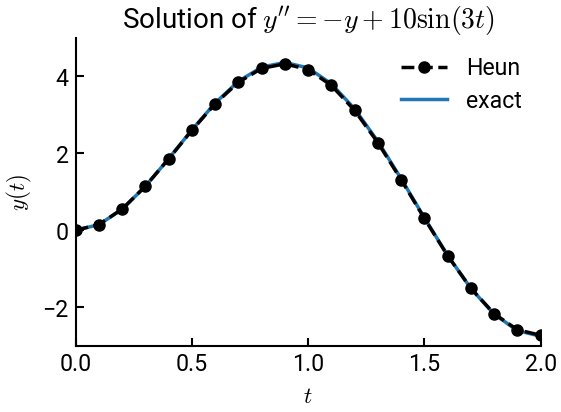

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Heun's method function
def heun(f, t0, tf, y0, h):
    y = [y0]
    t = np.arange(t0, tf+h, h)
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h * k1)
        y.append(y[n] + 0.5 * h * (k1 + k2))
    return t, np.array(y)

# logistic function
def my_func(t, y):
    return -y + 10 * np.sin(3 * t)

# initialize
y0 = 0
t0 = 0
tf = 2
h = 0.1

# execute the Euler method solver
t, y = heun(my_func, t0, tf, y0, h)
y_exact = -3 * np.cos(3 * t) + np.sin(3 * t) + 3 * np.exp(-t)

# plot the result
fig, ax = plt.subplots()
ax.plot(t, y, 'k--o', lw=2.5, label='Heun')
ax.plot(t, y_exact, lw=2.5, label='exact', zorder=-5)
ax.set(xlabel='$t$', ylabel='$y(t)$', title=r"Solution of $y'' = -y + 10 \sin(3t)$",
       xlim=[0, tf], ylim=[-3, 5])
ax.legend()
plt.show()

From which we can immediately see that Heun's algorithm produces much more accurate results than either of the two Euler algorithms.